# Import Modules

In [141]:
import numpy as np
import pandas as pd
import seaborn as sns

import plotly.express as px
import plotly.figure_factory as ff

***
# Initialize and load dataset

In [2]:
raw_df = pd.read_csv('../dataset/Price of Tomato Karnataka(2016-2018).csv')

***
# Show dataframe in table

In [3]:
raw_df.head(10)

Market Arrival Date  Arrivals (Tonnes) Variety  \
0  Bagepalli     2/1/2016                6.0  Tomato   
1  Bagepalli     4/1/2016                6.0  Tomato   
2  Bagepalli     5/1/2016                6.0  Tomato   
3  Bagepalli     6/1/2016                4.0  Tomato   
4  Bagepalli     7/1/2016                5.0  Tomato   
5  Bagepalli    11/1/2016                5.0  Tomato   
6  Bagepalli    12/1/2016                6.0  Tomato   
7  Bagepalli   13/01/2016                7.0  Tomato   
8  Bagepalli   14/01/2016                7.0  Tomato   
9  Bagepalli   16/01/2016                5.0  Tomato   

  Minimum Price(Rs./Quintal) Maximum Price(Rs./Quintal)  \
0                       1000                       1800   
1                        900                       1800   
2                       1400                       2500   
3                       1400                       3000   
4                       1400                       2600   
5                       1400                       2800   
6                       1500                       2400   
7                       1400                       2600   
8                       1200                       2200   
9                       1200                       2200   

  Modal Price(Rs./Quintal)  
0                     1550  
1                     1550  
2                     2200  
3                     2400  
4                     2200  
5                     2200  
6                     2000  
7                     2200  
8                     2000  
9                     1800

In [4]:
raw_df.describe(include='all')

Market Arrival Date  Arrivals (Tonnes) Variety  \
count   11456        11321       11321.000000   11421   
unique     40          844                NaN       2   
top     Kolar   16/08/2016                NaN  Tomato   
freq      954           24                NaN   11196   
mean      NaN          NaN          80.269146     NaN   
std       NaN          NaN         154.967086     NaN   
min       NaN          NaN           1.000000     NaN   
25%       NaN          NaN           4.000000     NaN   
50%       NaN          NaN          19.000000     NaN   
75%       NaN          NaN          70.000000     NaN   
max       NaN          NaN        1931.000000     NaN   

       Minimum Price(Rs./Quintal) Maximum Price(Rs./Quintal)  \
count                       11456                      11456   
unique                        679                        934   
top                           300                       1000   
freq                         1179                        939   
mean                          NaN                        NaN   
std                           NaN                        NaN   
min                           NaN                        NaN   
25%                           NaN                        NaN   
50%                           NaN                        NaN   
75%                           NaN                        NaN   
max                           NaN                        NaN   

       Modal Price(Rs./Quintal)  
count                     11456  
unique                     1016  
top                         500  
freq                        675  
mean                        NaN  
std                         NaN  
min                         NaN  
25%                         NaN  
50%                         NaN  
75%                         NaN  
max                         NaN

***
# Data Clean

***
## - Mismatched Value

Replace value NR with 0

In [5]:
raw_replace_zero_df = raw_df.replace('NR', 0)

Ganti datatype untuk kolom Minimum Price(Rs./Quintal), Maximum Price(Rs./Quintal), dan Modal Price(Rs./Quintal) menjadi int64.

In [6]:
# raw_replace_zero_df[(raw_replace_zero_df['Minimum Price(Rs./Quintal)'] == 'NR') | (raw_replace_zero_df['Maximum Price(Rs./Quintal)'] == 'NR') | (raw_replace_zero_df['Modal Price(Rs./Quintal)'] == 'NR')]
raw_convert_datatype_df =raw_replace_zero_df.astype({'Minimum Price(Rs./Quintal)':'int64',
                                                     'Maximum Price(Rs./Quintal)':'int64',
                                                     'Modal Price(Rs./Quintal)':'int64'},
                                                   )

In [7]:
raw_convert_datatype_df.dtypes

Market                         object
Arrival Date                   object
Arrivals (Tonnes)             float64
Variety                        object
Minimum Price(Rs./Quintal)      int64
Maximum Price(Rs./Quintal)      int64
Modal Price(Rs./Quintal)        int64
dtype: object

In [8]:
raw_convert_datatype_df.isna().sum()

Market                          0
Arrival Date                  135
Arrivals (Tonnes)             135
Variety                        35
Minimum Price(Rs./Quintal)      0
Maximum Price(Rs./Quintal)      0
Modal Price(Rs./Quintal)        0
dtype: int64

***
## - Duplicate Value

Before

In [9]:
print('Number of duplicated data is', raw_convert_datatype_df[raw_convert_datatype_df.duplicated()].shape[0], 'rows')

Number of duplicated data is 76 rows


In [10]:
raw_no_duplicate_df = raw_convert_datatype_df[~raw_convert_datatype_df.duplicated()]

After

In [11]:
print('Number of duplicated data is',raw_no_duplicate_df[raw_no_duplicate_df.duplicated()].shape[0], 'rows')

Number of duplicated data is 0 rows


***
## - Missing Value

In [12]:
raw_no_duplicate_df.shape

(11380, 7)

In [13]:
raw_no_duplicate_df.isna().sum()

Market                         0
Arrival Date                  59
Arrivals (Tonnes)             59
Variety                       35
Minimum Price(Rs./Quintal)     0
Maximum Price(Rs./Quintal)     0
Modal Price(Rs./Quintal)       0
dtype: int64

In [14]:
raw_with_mv_df = raw_no_duplicate_df[(raw_no_duplicate_df['Arrival Date'].isna()) | (raw_no_duplicate_df['Arrivals (Tonnes)'].isna()) | (raw_no_duplicate_df['Variety'].isna())]

In [15]:
pd.set_option('max_rows', None)

In [16]:
raw_with_mv_df.dropna(subset=['Arrival Date', 'Arrivals (Tonnes)'])

Market Arrival Date  Arrivals (Tonnes) Variety  \
9037            Bagepalli   21/11/2017               13.0     NaN   
9038            Bagepalli   22/11/2017               13.0     NaN   
9039            Bagepalli   23/11/2017               14.0     NaN   
9040            Bagepalli   25/11/2017               16.0     NaN   
9041            Bagepalli   27/11/2017               16.0     NaN   
9042            Bagepalli   28/11/2017               16.0     NaN   
9043            Bagepalli   29/11/2017               16.0     NaN   
9044            Bagepalli   30/11/2017               18.0     NaN   
9422            Bagepalli    2/12/2017               20.0     NaN   
9423            Bagepalli    4/12/2017               21.0     NaN   
9424            Bagepalli    5/12/2017               22.0     NaN   
9425            Bagepalli    6/12/2017               23.0     NaN   
9426            Bagepalli    7/12/2017               24.0     NaN   
9427            Bagepalli   11/12/2017               26.0     NaN   
9428            Bagepalli   12/12/2017               25.0     NaN   
9429            Bagepalli   13/12/2017               26.0     NaN   
9430            Bagepalli   14/12/2017               29.0     NaN   
9431            Bagepalli   16/12/2017               27.0     NaN   
9432            Bagepalli   18/12/2017               29.0     NaN   
9433            Bagepalli   19/12/2017               29.0     NaN   
9434            Bagepalli   20/12/2017               31.0     NaN   
9435            Bagepalli   21/12/2017               33.0     NaN   
9436            Bagepalli   26/12/2017               29.0     NaN   
9437            Bagepalli   27/12/2017               32.0     NaN   
9438            Bagepalli   28/12/2017               32.0     NaN   
9439            Bagepalli   30/12/2017               32.0     NaN   
9465            Bangarpet   30/12/2017                1.0     NaN   
9592           Chintamani   30/12/2017              363.0     NaN   
9635       Doddaballa Pur   30/12/2017                1.0     NaN   
9669            K.R.Nagar   30/12/2017                1.0     NaN   
9720                Kolar   31/12/2017              416.0     NaN   
9754           Mulabagilu   31/12/2017               70.0     NaN   
9780  Mysore (Bandipalya)   31/12/2017              361.0     NaN   
9838         Srinivasapur   30/12/2017               25.0     NaN   
9839         Srinivasapur   31/12/2017               27.0     NaN   

      Minimum Price(Rs./Quintal)  Maximum Price(Rs./Quintal)  \
9037                           0                           0   
9038                           0                           0   
9039                           0                           0   
9040                           0                           0   
9041                           0                           0   
9042                           0                           0   
9043                           0                           0   
9044                           0                           0   
9422                           0                           0   
9423                           0                           0   
9424                           0                           0   
9425                           0                           0   
9426                           0                           0   
9427                           0                           0   
9428                           0                           0   
9429                           0                           0   
9430                           0                           0   
9431                           0                           0   
9432                           0                           0   
9433                           0                           0   
9434                           0                           0   
9435                           0                           0   
9436                           0                           0  

In [17]:
raw_no_duplicate_df[raw_no_duplicate_df['Market'] == 'Hoskote'].sort_values(by='Arrival Date')

Market Arrival Date  Arrivals (Tonnes) Variety  \
1218  Hoskote   13/04/2016                3.0  Hybrid   
470   Hoskote   16/02/2016                5.0  Tomato   
165   Hoskote   18/01/2016                5.0  Hybrid   
824   Hoskote   18/03/2016                3.0  Hybrid   
825   Hoskote   23/03/2016                3.0  Tomato   
826   Hoskote   28/03/2016                3.0  Tomato   
822   Hoskote     4/3/2016                5.0  Tomato   
1217  Hoskote     4/4/2016                3.0  Tomato   
469   Hoskote     5/2/2016                5.0  Hybrid   
823   Hoskote     9/3/2016                6.0  Tomato   
166   Hoskote          NaN                NaN  Tomato   

      Minimum Price(Rs./Quintal)  Maximum Price(Rs./Quintal)  \
1218                         700                         700   
470                          900                        1000   
165                         2000                        2400   
824                          800                         800   
825                          800                         800   
826                          800                         800   
822                          800                        1000   
1217                         800                         800   
469                         2600                        2800   
823                          800                        1000   
166                         2000                        2400   

      Modal Price(Rs./Quintal)  
1218                       700  
470                        950  
165                       2300  
824                        800  
825                        800  
826                        800  
822                        900  
1217                       800  
469                       2700  
823                        900  
166                       2300

In [18]:
raw_no_duplicate_df.shape

(11380, 7)

In [19]:
raw_no_duplicate_df.isna().sum().to_frame()

0
Market                       0
Arrival Date                59
Arrivals (Tonnes)           59
Variety                     35
Minimum Price(Rs./Quintal)   0
Maximum Price(Rs./Quintal)   0
Modal Price(Rs./Quintal)     0

In [20]:
raw_no_duplicate_df[raw_no_duplicate_df['Market'] == 'Hoskote']

Market Arrival Date  Arrivals (Tonnes) Variety  \
165   Hoskote   18/01/2016                5.0  Hybrid   
166   Hoskote          NaN                NaN  Tomato   
469   Hoskote     5/2/2016                5.0  Hybrid   
470   Hoskote   16/02/2016                5.0  Tomato   
822   Hoskote     4/3/2016                5.0  Tomato   
823   Hoskote     9/3/2016                6.0  Tomato   
824   Hoskote   18/03/2016                3.0  Hybrid   
825   Hoskote   23/03/2016                3.0  Tomato   
826   Hoskote   28/03/2016                3.0  Tomato   
1217  Hoskote     4/4/2016                3.0  Tomato   
1218  Hoskote   13/04/2016                3.0  Hybrid   

      Minimum Price(Rs./Quintal)  Maximum Price(Rs./Quintal)  \
165                         2000                        2400   
166                         2000                        2400   
469                         2600                        2800   
470                          900                        1000   
822                          800                        1000   
823                          800                        1000   
824                          800                         800   
825                          800                         800   
826                          800                         800   
1217                         800                         800   
1218                         700                         700   

      Modal Price(Rs./Quintal)  
165                       2300  
166                       2300  
469                       2700  
470                        950  
822                        900  
823                        900  
824                        800  
825                        800  
826                        800  
1217                       800  
1218                       700

In [21]:
raw_no_duplicate_df[raw_no_duplicate_df['Market'] == 'Kolar']

Market Arrival Date  Arrivals (Tonnes) Variety  \
178    Kolar     1/1/2016              181.0  Tomato   
179    Kolar     2/1/2016              185.0  Tomato   
180    Kolar     3/1/2016              110.0  Tomato   
181    Kolar     4/1/2016              185.0  Tomato   
182    Kolar     5/1/2016              195.0  Tomato   
183    Kolar     6/1/2016              134.0  Tomato   
184    Kolar     8/1/2016              114.0  Tomato   
185    Kolar     9/1/2016              176.0  Tomato   
186    Kolar    12/1/2016              197.0  Tomato   
187    Kolar   13/01/2016              194.0  Tomato   
188    Kolar   14/01/2016              209.0  Tomato   
189    Kolar   15/01/2016              100.0  Tomato   
190    Kolar   16/01/2016               80.0  Tomato   
191    Kolar   17/01/2016               70.0  Tomato   
192    Kolar   18/01/2016              140.0  Tomato   
193    Kolar   19/01/2016              153.0  Tomato   
194    Kolar   20/01/2016              147.0  Tomato   
195    Kolar   21/01/2016              167.0  Tomato   
196    Kolar   22/01/2016              194.0  Tomato   
197    Kolar   23/01/2016              172.0  Tomato   
198    Kolar   24/01/2016              154.0  Tomato   
199    Kolar   25/01/2016              235.0  Tomato   
200    Kolar   26/01/2016              194.0  Tomato   
201    Kolar   31/01/2016              195.0  Tomato   
483    Kolar     1/2/2016              281.0  Tomato   
484    Kolar     5/2/2016              234.0  Tomato   
485    Kolar     7/2/2016              269.0  Tomato   
486    Kolar     8/2/2016              230.0  Tomato   
487    Kolar     9/2/2016              280.0  Tomato   
488    Kolar    12/2/2016              225.0  Tomato   
489    Kolar   13/02/2016              159.0  Tomato   
490    Kolar   14/02/2016              240.0  Tomato   
491    Kolar   15/02/2016              182.0  Tomato   
492    Kolar   16/02/2016              122.0  Tomato   
493    Kolar   17/02/2016              186.0  Tomato   
494    Kolar   18/02/2016              153.0  Tomato   
495    Kolar   19/02/2016              160.0  Tomato   
496    Kolar   20/02/2016              171.0  Tomato   
497    Kolar   21/02/2016              141.0  Tomato   
498    Kolar   22/02/2016              125.0  Tomato   
499    Kolar   23/02/2016              151.0  Tomato   
500    Kolar   24/02/2016              212.0  Tomato   
501    Kolar   25/02/2016              165.0  Tomato   
502    Kolar   26/02/2016              135.0  Tomato   
503    Kolar   27/02/2016              166.0  Tomato   
504    Kolar   28/02/2016              167.0  Tomato   
505    Kolar   29/02/2016              194.0  Tomato   
835    Kolar     1/3/2016              139.0  Tomato   
836    Kolar     2/3/2016              160.0  Tomato   
837    Kolar     3/3/2016              173.0  Tomato   
838    Kolar     4/3/2016              110.0  Tomato   
839    Kolar     5/3/2016              105.0  Tomato   
840    Kolar     6/3/2016               98.0  Tomato   
841    Kolar     7/3/2016              122.0  Tomato   
842    Kolar     8/3/2016              105.0  Tomato   
843    Kolar     9/3/2016               40.0  Tomato   
844    Kolar    10/3/2016               83.0  Tomato   
845    Kolar    11/3/2016              176.0  Tomato   
846    Kolar    12/3/2016              161.0  Tomato   
847    Kolar   13/03/2016              188.0  Tomato   
848    Kolar   14/03/2016              150.0  Tomato   
849    Kolar   15/03/2016              109.0  Tomato   
850    Kolar   16/03/2016              130.0  Tomato   
851    Kolar   17/03/2016               84.0  Tomato   
852    Kolar   18/03/2016              117.0  Tomato   
853    Kolar   19/03/2016              163.0  Tomato   
854    Kolar   20/03/2016              110.0  Tomato   
855    Kolar   21/03/2016              142.0  Tomato   
856    Kolar   22/03/2016              147.0  Tomato   
857    Kolar   23/03/2016              121.0  Tomato   
858    Kolar   24/03/2016     

In [22]:
raw_no_duplicate_df[(raw_no_duplicate_df['Arrival Date'].isna()) | (raw_no_duplicate_df['Arrivals (Tonnes)'].isna())]

Market Arrival Date  Arrivals (Tonnes) Variety  \
166    Hoskote          NaN                NaN  Tomato   
9681     Kolar          NaN                NaN  Tomato   
9683     Kolar          NaN                NaN  Tomato   
9685     Kolar          NaN                NaN  Tomato   
9687     Kolar          NaN                NaN  Tomato   
9691     Kolar          NaN                NaN  Tomato   
9693     Kolar          NaN                NaN  Tomato   
9695     Kolar          NaN                NaN  Tomato   
9699     Kolar          NaN                NaN  Tomato   
9711     Kolar          NaN                NaN  Tomato   
9713     Kolar          NaN                NaN  Tomato   
9715     Kolar          NaN                NaN  Tomato   
9717     Kolar          NaN                NaN  Tomato   
9719     Kolar          NaN                NaN  Tomato   
10115    Kolar          NaN                NaN  Tomato   
10119    Kolar          NaN                NaN  Tomato   
10127    Kolar          NaN                NaN  Tomato   
10129    Kolar          NaN                NaN  Tomato   
10137    Kolar          NaN                NaN  Tomato   
10141    Kolar          NaN                NaN  Tomato   
10143    Kolar          NaN                NaN  Tomato   
10145    Kolar          NaN                NaN  Tomato   
10149    Kolar          NaN                NaN  Tomato   
10157    Kolar          NaN                NaN  Tomato   
10161    Kolar          NaN                NaN  Tomato   
10165    Kolar          NaN                NaN  Tomato   
10167    Kolar          NaN                NaN  Tomato   
10171    Kolar          NaN                NaN  Tomato   
10173    Kolar          NaN                NaN  Tomato   
10541    Kolar          NaN                NaN  Tomato   
10547    Kolar          NaN                NaN  Tomato   
10549    Kolar          NaN                NaN  Tomato   
10551    Kolar          NaN                NaN  Tomato   
10555    Kolar          NaN                NaN  Tomato   
10559    Kolar          NaN                NaN  Tomato   
10565    Kolar          NaN                NaN  Tomato   
10567    Kolar          NaN                NaN  Tomato   
10573    Kolar          NaN                NaN  Tomato   
10579    Kolar          NaN                NaN  Tomato   
10595    Kolar          NaN                NaN  Tomato   
10968    Kolar          NaN                NaN  Tomato   
10972    Kolar          NaN                NaN  Tomato   
10982    Kolar          NaN                NaN  Tomato   
11004    Kolar          NaN                NaN  Tomato   
11006    Kolar          NaN                NaN  Tomato   
11014    Kolar          NaN                NaN  Tomato   
11018    Kolar          NaN                NaN  Tomato   
11022    Kolar          NaN                NaN  Tomato   
11024    Kolar          NaN                NaN  Tomato   
11028    Kolar          NaN                NaN  Tomato   
11324    Kolar          NaN                NaN  Tomato   
11328    Kolar          NaN                NaN  Tomato   
11334    Kolar          NaN                NaN  Tomato   
11342    Kolar          NaN                NaN  Tomato   
11352    Kolar          NaN                NaN  Tomato   
11354    Kolar          NaN                NaN  Tomato   
11356    Kolar          NaN                NaN  Tomato   
11360    Kolar          NaN                NaN  Tomato   
11366    Kolar          NaN                NaN  Tomato   

       Minimum Price(Rs./Quintal)  Maximum Price(Rs./Quintal)  \
166                          2000                        2400   
9681                          400                        1600   
9683                          500                        1167   
9685                          334                        1000   
9687                          334                         667   
9691                          300                        1000   
9693                          300                         634   
9695   

In [23]:
raw_no_duplicate_df.isna().sum()

Market                         0
Arrival Date                  59
Arrivals (Tonnes)             59
Variety                       35
Minimum Price(Rs./Quintal)     0
Maximum Price(Rs./Quintal)     0
Modal Price(Rs./Quintal)       0
dtype: int64

In [24]:
raw_no_mv_1_df = raw_no_duplicate_df.dropna(subset=['Arrival Date', 'Arrivals (Tonnes)'])

In [25]:
raw_no_mv_1_df.isna().sum()

Market                         0
Arrival Date                   0
Arrivals (Tonnes)              0
Variety                       35
Minimum Price(Rs./Quintal)     0
Maximum Price(Rs./Quintal)     0
Modal Price(Rs./Quintal)       0
dtype: int64

In [26]:
print('Number of missing value:', raw_no_mv_1_df[raw_no_mv_1_df['Variety'].isna()].shape[0])

Number of missing value: 35


In [27]:
raw_no_mv_1_df[raw_no_mv_1_df['Variety'].isna()]

Market Arrival Date  Arrivals (Tonnes) Variety  \
9037            Bagepalli   21/11/2017               13.0     NaN   
9038            Bagepalli   22/11/2017               13.0     NaN   
9039            Bagepalli   23/11/2017               14.0     NaN   
9040            Bagepalli   25/11/2017               16.0     NaN   
9041            Bagepalli   27/11/2017               16.0     NaN   
9042            Bagepalli   28/11/2017               16.0     NaN   
9043            Bagepalli   29/11/2017               16.0     NaN   
9044            Bagepalli   30/11/2017               18.0     NaN   
9422            Bagepalli    2/12/2017               20.0     NaN   
9423            Bagepalli    4/12/2017               21.0     NaN   
9424            Bagepalli    5/12/2017               22.0     NaN   
9425            Bagepalli    6/12/2017               23.0     NaN   
9426            Bagepalli    7/12/2017               24.0     NaN   
9427            Bagepalli   11/12/2017               26.0     NaN   
9428            Bagepalli   12/12/2017               25.0     NaN   
9429            Bagepalli   13/12/2017               26.0     NaN   
9430            Bagepalli   14/12/2017               29.0     NaN   
9431            Bagepalli   16/12/2017               27.0     NaN   
9432            Bagepalli   18/12/2017               29.0     NaN   
9433            Bagepalli   19/12/2017               29.0     NaN   
9434            Bagepalli   20/12/2017               31.0     NaN   
9435            Bagepalli   21/12/2017               33.0     NaN   
9436            Bagepalli   26/12/2017               29.0     NaN   
9437            Bagepalli   27/12/2017               32.0     NaN   
9438            Bagepalli   28/12/2017               32.0     NaN   
9439            Bagepalli   30/12/2017               32.0     NaN   
9465            Bangarpet   30/12/2017                1.0     NaN   
9592           Chintamani   30/12/2017              363.0     NaN   
9635       Doddaballa Pur   30/12/2017                1.0     NaN   
9669            K.R.Nagar   30/12/2017                1.0     NaN   
9720                Kolar   31/12/2017              416.0     NaN   
9754           Mulabagilu   31/12/2017               70.0     NaN   
9780  Mysore (Bandipalya)   31/12/2017              361.0     NaN   
9838         Srinivasapur   30/12/2017               25.0     NaN   
9839         Srinivasapur   31/12/2017               27.0     NaN   

      Minimum Price(Rs./Quintal)  Maximum Price(Rs./Quintal)  \
9037                           0                           0   
9038                           0                           0   
9039                           0                           0   
9040                           0                           0   
9041                           0                           0   
9042                           0                           0   
9043                           0                           0   
9044                           0                           0   
9422                           0                           0   
9423                           0                           0   
9424                           0                           0   
9425                           0                           0   
9426                           0                           0   
9427                           0                           0   
9428                           0                           0   
9429                           0                           0   
9430                           0                           0   
9431                           0                           0   
9432                           0                           0   
9433                           0                           0   
9434                           0                           0   
9435                           0                           0   
9436                           0                           0  

In [28]:
raw_no_mv_df = raw_no_mv_1_df.fillna('Tomato')

In [29]:
raw_no_mv_df.shape

(11321, 7)

In [30]:
raw_no_mv_df.isna().sum()

Market                        0
Arrival Date                  0
Arrivals (Tonnes)             0
Variety                       0
Minimum Price(Rs./Quintal)    0
Maximum Price(Rs./Quintal)    0
Modal Price(Rs./Quintal)      0
dtype: int64

In [31]:
raw_no_mv_df[raw_no_mv_df['Market'] == 'Kolar']

Market Arrival Date  Arrivals (Tonnes) Variety  \
178    Kolar     1/1/2016              181.0  Tomato   
179    Kolar     2/1/2016              185.0  Tomato   
180    Kolar     3/1/2016              110.0  Tomato   
181    Kolar     4/1/2016              185.0  Tomato   
182    Kolar     5/1/2016              195.0  Tomato   
183    Kolar     6/1/2016              134.0  Tomato   
184    Kolar     8/1/2016              114.0  Tomato   
185    Kolar     9/1/2016              176.0  Tomato   
186    Kolar    12/1/2016              197.0  Tomato   
187    Kolar   13/01/2016              194.0  Tomato   
188    Kolar   14/01/2016              209.0  Tomato   
189    Kolar   15/01/2016              100.0  Tomato   
190    Kolar   16/01/2016               80.0  Tomato   
191    Kolar   17/01/2016               70.0  Tomato   
192    Kolar   18/01/2016              140.0  Tomato   
193    Kolar   19/01/2016              153.0  Tomato   
194    Kolar   20/01/2016              147.0  Tomato   
195    Kolar   21/01/2016              167.0  Tomato   
196    Kolar   22/01/2016              194.0  Tomato   
197    Kolar   23/01/2016              172.0  Tomato   
198    Kolar   24/01/2016              154.0  Tomato   
199    Kolar   25/01/2016              235.0  Tomato   
200    Kolar   26/01/2016              194.0  Tomato   
201    Kolar   31/01/2016              195.0  Tomato   
483    Kolar     1/2/2016              281.0  Tomato   
484    Kolar     5/2/2016              234.0  Tomato   
485    Kolar     7/2/2016              269.0  Tomato   
486    Kolar     8/2/2016              230.0  Tomato   
487    Kolar     9/2/2016              280.0  Tomato   
488    Kolar    12/2/2016              225.0  Tomato   
489    Kolar   13/02/2016              159.0  Tomato   
490    Kolar   14/02/2016              240.0  Tomato   
491    Kolar   15/02/2016              182.0  Tomato   
492    Kolar   16/02/2016              122.0  Tomato   
493    Kolar   17/02/2016              186.0  Tomato   
494    Kolar   18/02/2016              153.0  Tomato   
495    Kolar   19/02/2016              160.0  Tomato   
496    Kolar   20/02/2016              171.0  Tomato   
497    Kolar   21/02/2016              141.0  Tomato   
498    Kolar   22/02/2016              125.0  Tomato   
499    Kolar   23/02/2016              151.0  Tomato   
500    Kolar   24/02/2016              212.0  Tomato   
501    Kolar   25/02/2016              165.0  Tomato   
502    Kolar   26/02/2016              135.0  Tomato   
503    Kolar   27/02/2016              166.0  Tomato   
504    Kolar   28/02/2016              167.0  Tomato   
505    Kolar   29/02/2016              194.0  Tomato   
835    Kolar     1/3/2016              139.0  Tomato   
836    Kolar     2/3/2016              160.0  Tomato   
837    Kolar     3/3/2016              173.0  Tomato   
838    Kolar     4/3/2016              110.0  Tomato   
839    Kolar     5/3/2016              105.0  Tomato   
840    Kolar     6/3/2016               98.0  Tomato   
841    Kolar     7/3/2016              122.0  Tomato   
842    Kolar     8/3/2016              105.0  Tomato   
843    Kolar     9/3/2016               40.0  Tomato   
844    Kolar    10/3/2016               83.0  Tomato   
845    Kolar    11/3/2016              176.0  Tomato   
846    Kolar    12/3/2016              161.0  Tomato   
847    Kolar   13/03/2016              188.0  Tomato   
848    Kolar   14/03/2016              150.0  Tomato   
849    Kolar   15/03/2016              109.0  Tomato   
850    Kolar   16/03/2016              130.0  Tomato   
851    Kolar   17/03/2016               84.0  Tomato   
852    Kolar   18/03/2016              117.0  Tomato   
853    Kolar   19/03/2016              163.0  Tomato   
854    Kolar   20/03/2016              110.0  Tomato   
855    Kolar   21/03/2016              142.0  Tomato   
856    Kolar   22/03/2016              147.0  Tomato   
857    Kolar   23/03/2016              121.0  Tomato   
858    Kolar   24/03/2016     

In [98]:
raw_convert_datatype_df.isna().sum()

Market                          0
Arrival Date                  135
Arrivals (Tonnes)             135
Variety                        35
Minimum Price(Rs./Quintal)      0
Maximum Price(Rs./Quintal)      0
Modal Price(Rs./Quintal)        0
dtype: int64

In [103]:
raw_convert_datatype_df[raw_convert_datatype_df.duplicated()].shape

(76, 7)

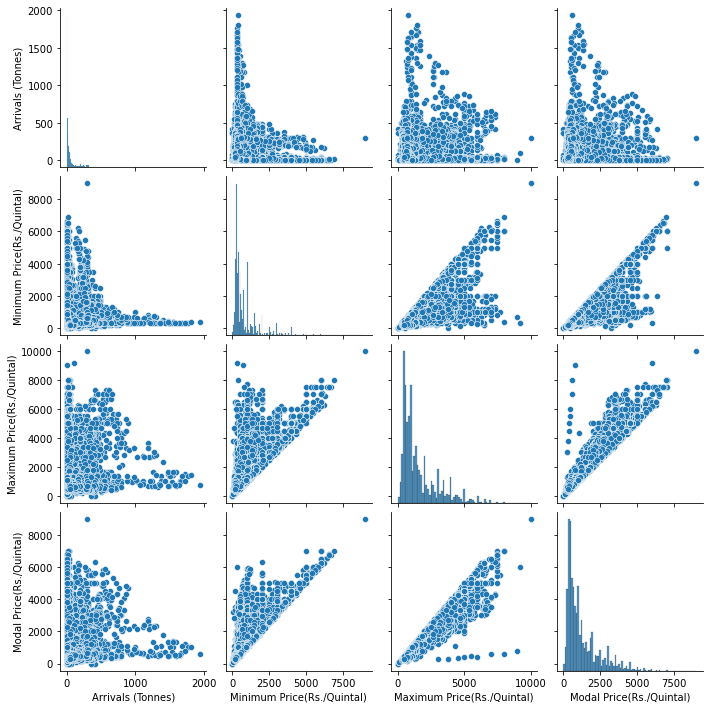

In [32]:
plot_raw_convert_datatype = sns.pairplot(raw_convert_datatype_df)
# plot_raw_convert_datatype.savefig("../images/plot_raw_convert_datatype.jpg")

In [104]:
raw_no_duplicate_df.isna().sum()

Market                         0
Arrival Date                  59
Arrivals (Tonnes)             59
Variety                       35
Minimum Price(Rs./Quintal)     0
Maximum Price(Rs./Quintal)     0
Modal Price(Rs./Quintal)       0
dtype: int64

In [105]:
raw_no_duplicate_df[raw_no_duplicate_df.duplicated()].shape

(0, 7)

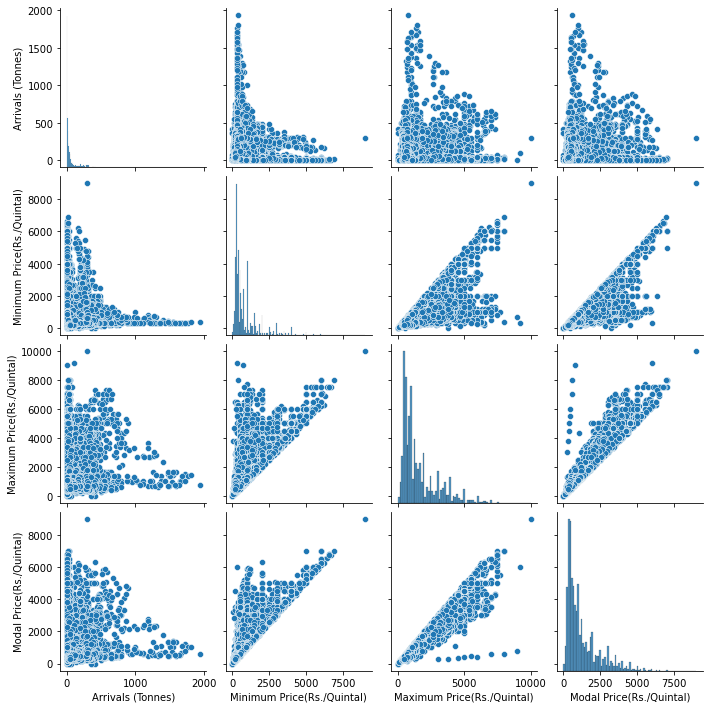

In [33]:
plot_raw_no_duplicate = sns.pairplot(raw_no_duplicate_df)
# plot_raw_no_duplicate.savefig("../images/plot_raw_no_duplicate.jpg")

In [106]:
raw_no_mv_df.isna().sum()

Market                        0
Arrival Date                  0
Arrivals (Tonnes)             0
Variety                       0
Minimum Price(Rs./Quintal)    0
Maximum Price(Rs./Quintal)    0
Modal Price(Rs./Quintal)      0
dtype: int64

In [108]:
raw_no_mv_df[raw_no_mv_df.duplicated()].shape

(0, 7)

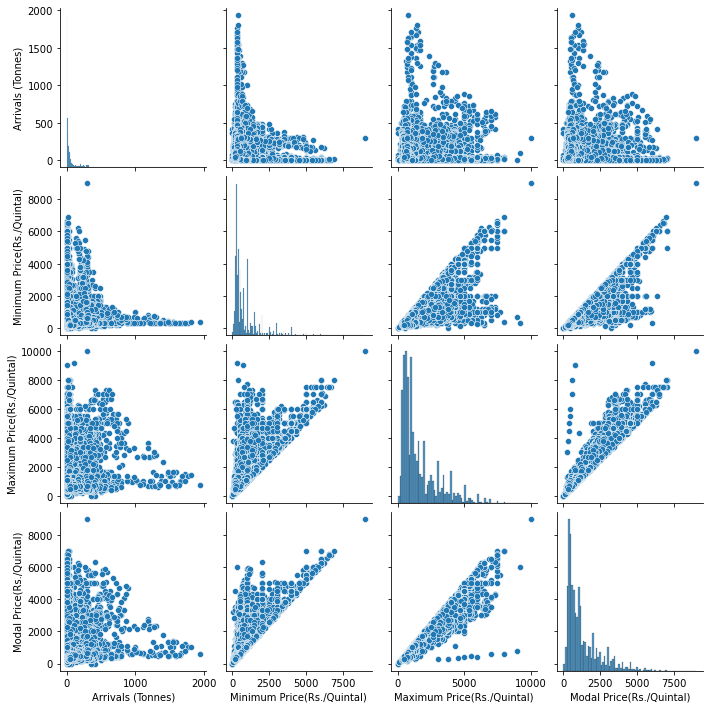

In [34]:
plot_raw_no_mv = sns.pairplot(raw_no_mv_df)
# plot_raw_no_mv.savefig("../images/plot_raw_no_mv.jpg")

In [35]:
# raw_no_mv.to_csv('../dataset/raw_no_mv.csv')

In [36]:
raw_no_mv_df.columns

Index(['Market', 'Arrival Date', 'Arrivals (Tonnes)', 'Variety',
       'Minimum Price(Rs./Quintal)', 'Maximum Price(Rs./Quintal)',
       'Modal Price(Rs./Quintal)'],
      dtype='object')

In [37]:
raw_no_mv_df[(raw_no_mv_df['Minimum Price(Rs./Quintal)'] == 0) |
             (raw_no_mv_df['Maximum Price(Rs./Quintal)'] == 0) |
             (raw_no_mv_df['Modal Price(Rs./Quintal)'] == 0)
            ]

Market Arrival Date  Arrivals (Tonnes) Variety  \
9037            Bagepalli   21/11/2017               13.0  Tomato   
9038            Bagepalli   22/11/2017               13.0  Tomato   
9039            Bagepalli   23/11/2017               14.0  Tomato   
9040            Bagepalli   25/11/2017               16.0  Tomato   
9041            Bagepalli   27/11/2017               16.0  Tomato   
9042            Bagepalli   28/11/2017               16.0  Tomato   
9043            Bagepalli   29/11/2017               16.0  Tomato   
9044            Bagepalli   30/11/2017               18.0  Tomato   
9422            Bagepalli    2/12/2017               20.0  Tomato   
9423            Bagepalli    4/12/2017               21.0  Tomato   
9424            Bagepalli    5/12/2017               22.0  Tomato   
9425            Bagepalli    6/12/2017               23.0  Tomato   
9426            Bagepalli    7/12/2017               24.0  Tomato   
9427            Bagepalli   11/12/2017               26.0  Tomato   
9428            Bagepalli   12/12/2017               25.0  Tomato   
9429            Bagepalli   13/12/2017               26.0  Tomato   
9430            Bagepalli   14/12/2017               29.0  Tomato   
9431            Bagepalli   16/12/2017               27.0  Tomato   
9432            Bagepalli   18/12/2017               29.0  Tomato   
9433            Bagepalli   19/12/2017               29.0  Tomato   
9434            Bagepalli   20/12/2017               31.0  Tomato   
9435            Bagepalli   21/12/2017               33.0  Tomato   
9436            Bagepalli   26/12/2017               29.0  Tomato   
9437            Bagepalli   27/12/2017               32.0  Tomato   
9438            Bagepalli   28/12/2017               32.0  Tomato   
9439            Bagepalli   30/12/2017               32.0  Tomato   
9465            Bangarpet   30/12/2017                1.0  Tomato   
9592           Chintamani   30/12/2017              363.0  Tomato   
9635       Doddaballa Pur   30/12/2017                1.0  Tomato   
9669            K.R.Nagar   30/12/2017                1.0  Tomato   
9720                Kolar   31/12/2017              416.0  Tomato   
9754           Mulabagilu   31/12/2017               70.0  Tomato   
9780  Mysore (Bandipalya)   31/12/2017              361.0  Tomato   
9838         Srinivasapur   30/12/2017               25.0  Tomato   
9839         Srinivasapur   31/12/2017               27.0  Tomato   

      Minimum Price(Rs./Quintal)  Maximum Price(Rs./Quintal)  \
9037                           0                           0   
9038                           0                           0   
9039                           0                           0   
9040                           0                           0   
9041                           0                           0   
9042                           0                           0   
9043                           0                           0   
9044                           0                           0   
9422                           0                           0   
9423                           0                           0   
9424                           0                           0   
9425                           0                           0   
9426                           0                           0   
9427                           0                           0   
9428                           0                           0   
9429                           0                           0   
9430                           0                           0   
9431                           0                           0   
9432                           0                           0   
9433                           0                           0   
9434                           0                           0   
9435                           0                           0   
9436                           0                           0  

In [38]:
round(raw_no_mv_df.describe())

Arrivals (Tonnes)  Minimum Price(Rs./Quintal)  \
count            11321.0                     11321.0   
mean                80.0                       863.0   
std                155.0                       925.0   
min                  1.0                         0.0   
25%                  4.0                       300.0   
50%                 19.0                       500.0   
75%                 70.0                      1000.0   
max               1931.0                      9000.0   

       Maximum Price(Rs./Quintal)  Modal Price(Rs./Quintal)  
count                     11321.0                   11321.0  
mean                       1610.0                    1274.0  
std                        1386.0                    1126.0  
min                           0.0                       0.0  
25%                         600.0                     500.0  
50%                        1000.0                     900.0  
75%                        2134.0                    1734.0  
max                       10000.0                    9000.0

In [39]:
raw_no_mv_df['Minimum Price(Rs./Quintal)'].replace(0, 863, inplace=True)

In [40]:
raw_no_mv_df['Maximum Price(Rs./Quintal)'].replace(0, 1610, inplace=True)

In [41]:
raw_no_mv_df['Modal Price(Rs./Quintal)'].replace(0, 1274, inplace=True)

In [42]:
raw_no_mv_df[(raw_no_mv_df['Minimum Price(Rs./Quintal)'] == 0) |
             (raw_no_mv_df['Maximum Price(Rs./Quintal)'] == 0) |
             (raw_no_mv_df['Modal Price(Rs./Quintal)'] == 0)
            ]

Empty DataFrame
Columns: [Market, Arrival Date, Arrivals (Tonnes), Variety, Minimum Price(Rs./Quintal), Maximum Price(Rs./Quintal), Modal Price(Rs./Quintal)]
Index: []

In [43]:
raw_no_mv_df.describe()

Arrivals (Tonnes)  Minimum Price(Rs./Quintal)  \
count       11321.000000                11321.000000   
mean           80.269146                  865.678385   
std           154.967086                  924.192722   
min             1.000000                   22.000000   
25%             4.000000                  300.000000   
50%            19.000000                  500.000000   
75%            70.000000                 1000.000000   
max          1931.000000                 9000.000000   

       Maximum Price(Rs./Quintal)  Modal Price(Rs./Quintal)  
count                11321.000000              11321.000000  
mean                  1614.712481               1277.489356  
std                   1383.453997               1123.668165  
min                    100.000000                 70.000000  
25%                    600.000000                500.000000  
50%                   1000.000000                900.000000  
75%                   2134.000000               1734.000000  
max                  10000.000000               9000.000000

***
## - Outlier

***
### Create function

In [44]:
def determine_lower_upper_outliers(column_name):
    quartile_1          = column_name.quantile(0.25)
    quartile_3          = column_name.quantile(0.75)
    interquartilerange  = quartile_3 - quartile_1
    lower_bound_outlier = quartile_1 - 1.5 * interquartilerange if quartile_1 - 1.5 * interquartilerange >= 0 else 0
    upper_bound_outlier = quartile_3 + 1.5 * interquartilerange

    return [lower_bound_outlier, upper_bound_outlier]

def print_limit_outlier(arr_lower_upper):
    print("Lower bound outlier:", arr_lower_upper[0])
    print("Upper bound outlier:", arr_lower_upper[1])

In [45]:
raw_final_df = pd.read_csv('../dataset/raw_no_mv_dataset.csv')

***
### - arrival_tonnes

In [47]:
print_limit_outlier(determine_lower_upper_outliers(raw_final_df['arrivals_tonnes']))

Lower bound outlier: 0
Upper bound outlier: 169.0


In [70]:
print('Number of row with no outlier in feature arrival_tonnes:', raw_final_df[raw_final_df['arrivals_tonnes'] <= 169.0].shape[0])

Number of row with no outlier in feature arrival_tonnes: 9470


In [71]:
raw_final_df.columns

Index(['market', 'arrival_date', 'arrivals_tonnes', 'variety', 'minimum_price',
       'maximum_price', 'modal_price'],
      dtype='object')

### Histogram

In [82]:
fig = px.histogram(raw_final_df, x="arrivals_tonnes")

fig.update_layout(
    title   = 'Histogram with Outlier',
    title_x = 0.5
)

fig.show()

In [83]:
arrivals_tonnes = raw_final_df[raw_final_df['arrivals_tonnes'] <= 169.0]
fig = px.histogram(arrivals_tonnes, x="arrivals_tonnes")

fig.update_layout(
    title   = 'Histogram with No Outlier',
    title_x = 0.5
)

fig.show()

***
### - minimum_price

In [84]:
print_limit_outlier(determine_lower_upper_outliers(raw_final_df['minimum_price']))

Lower bound outlier: 0
Upper bound outlier: 2050.0


In [85]:
print('Number of row with no outlier in feature minimum_price:', raw_final_df[raw_final_df['minimum_price'] <= 2050.0].shape[0])

Number of row with no outlier in feature minimum_price: 10338


### Histogram

In [88]:
fig = px.histogram(raw_final_df, x="minimum_price")

fig.update_layout(
    title   = 'Histogram with Outlier',
    title_x = 0.5
)

fig.show()

In [89]:
arrivals_tonnes = raw_final_df[raw_final_df['minimum_price'] <= 2050.0]
fig = px.histogram(arrivals_tonnes, x="minimum_price")

fig.update_layout(
    title   = 'Histogram with No Outlier',
    title_x = 0.5
)

fig.show()

***
### - maximum_price 

In [90]:
print_limit_outlier(determine_lower_upper_outliers(raw_final_df['maximum_price']))

Lower bound outlier: 0
Upper bound outlier: 4435.0


In [91]:
print('Number of row with no outlier in feature minimum_price:', raw_final_df[raw_final_df['maximum_price'] <= 4435.0].shape[0])

Number of row with no outlier in feature minimum_price: 10694


### Histogram

In [92]:
fig = px.histogram(raw_final_df, x="maximum_price")

fig.update_layout(
    title   = 'Histogram with Outlier',
    title_x = 0.5
)

fig.show()

In [93]:
arrivals_tonnes = raw_final_df[raw_final_df['maximum_price'] <= 4435.0]
fig = px.histogram(arrivals_tonnes, x="maximum_price")

fig.update_layout(
    title   = 'Histogram with No Outlier',
    title_x = 0.5
)

fig.show()

***
### - modal_price

In [94]:
print_limit_outlier(determine_lower_upper_outliers(raw_final_df['modal_price']))

Lower bound outlier: 0
Upper bound outlier: 3585.0


In [95]:
print('Number of row with no outlier in feature modal_price:', raw_final_df[raw_final_df['minimum_price'] <= 3585.0].shape[0])

Number of row with no outlier in feature modal_price: 11004


### Histogram

In [96]:
fig = px.histogram(raw_final_df, x="minimum_price")

fig.update_layout(
    title   = 'Histogram with Outlier',
    title_x = 0.5
)

fig.show()

In [97]:
arrivals_tonnes = raw_final_df[raw_final_df['modal_price'] <= 3585.0]
fig = px.histogram(arrivals_tonnes, x="modal_price")

fig.update_layout(
    title   = 'Histogram with No Outlier',
    title_x = 0.5
)

fig.show()

***
# Scatterplot all feature with outlier

In [136]:
import plotly.express as px

fig = px.scatter_matrix(raw_final_df,
                        dimensions = ["arrivals_tonnes", "minimum_price", "maximum_price", "modal_price"],
                        color      = "variety")

fig.update_layout(
    height = 1000
)

fig.show()

***
# Scatterplot with raw no missing value dataframe

In [147]:
fig = px.scatter_matrix(raw_no_mv_df,
                        dimensions = ['Arrivals (Tonnes)', 'Minimum Price(Rs./Quintal)', 'Maximum Price(Rs./Quintal)', 'Modal Price(Rs./Quintal)'],
                        color      = "Variety")

fig.update_layout(
    height = 1000
)

fig.show()

***
# Scatterplot with no outlier

### - with operator OR

In [132]:
raw_no_outlier_df = raw_final_df[(raw_final_df['arrivals_tonnes'] <= 169.0) |
                                 (raw_final_df['minimum_price'] <= 2050.0) |
                                 (raw_final_df['maximum_price'] <= 4435.0) |
                                 (raw_final_df['modal_price'] <= 3585.0)]

In [137]:
raw_no_outlier_df.shape[0]

11287

Save dataframe in format .csv

In [149]:
# raw_no_outlier_df.to_csv('../dataset/raw_no_outlier_operator_or_dataset.csv')

In [135]:
import plotly.express as px

fig = px.scatter_matrix(raw_no_outlier_df,
                        dimensions = ["arrivals_tonnes", "minimum_price", "maximum_price", "modal_price"],
                        color      = "variety")

fig.update_layout(
    height = 1000
)

fig.show()

### - With operator AND

In [150]:
raw_no_outlier_df = raw_final_df[(raw_final_df['arrivals_tonnes'] <= 169.0) &
                                 (raw_final_df['minimum_price'] <= 2050.0) &
                                 (raw_final_df['maximum_price'] <= 4435.0) &
                                 (raw_final_df['modal_price'] <= 3585.0)]

In [139]:
raw_no_outlier_df.shape[0]

8398

Save dataframe in format .csv

In [152]:
# raw_no_outlier_df.to_csv('../dataset/raw_no_outlier_operator_and_dataset.csv')

In [140]:
import plotly.express as px

fig = px.scatter_matrix(raw_no_outlier_df,
                        dimensions = ["arrivals_tonnes", "minimum_price", "maximum_price", "modal_price"],
                        color      = "variety")

fig.update_layout(
    height = 1000
)

fig.show()